In [1]:

import cv2
import numpy as np
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from plantcv.learn import train_kmeans
from plantcv.plantcv.analyze import color as analyze_color
from plantcv.plantcv.visualize import obj_sizes


In [2]:
# Set input variables
args = WorkflowInputs(images=[r"C:\Cantonese\real\topview3.jpg"],
                      names="image",
                      result="plantcv_results.csv",
                      debug="plot")

# Set variables
pcv.params.debug = args.debug
pcv.params.dpi = 100
pcv.params.text_size = 0.5
pcv.params.text_thickness = 3

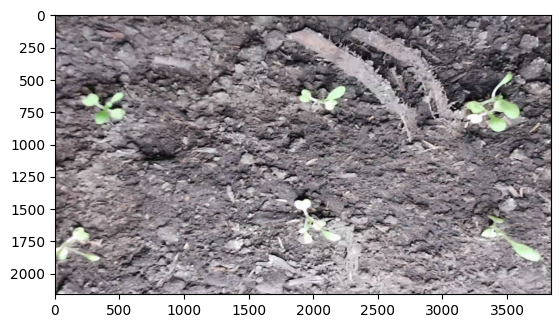

In [3]:
img, imgpath, imgname = pcv.readimage(filename=args.image)

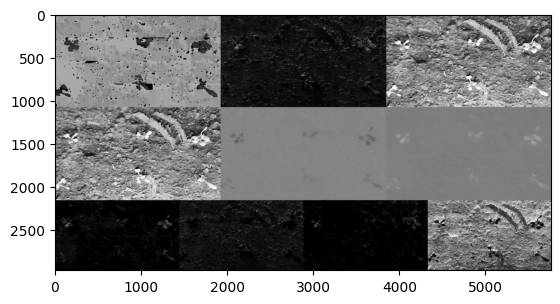

In [4]:
colorspaces = pcv.visualize.colorspaces(rgb_img=img, original_img=False)

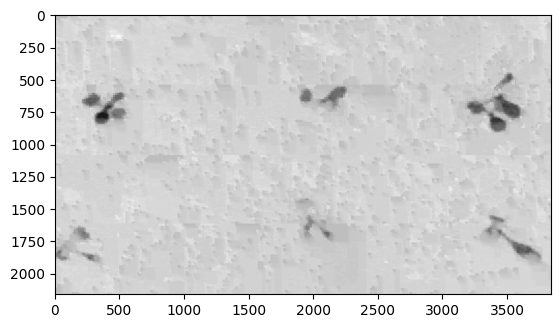

In [7]:
a = pcv.rgb2gray_lab(rgb_img=img, channel='a')

In [8]:
hist_a = pcv.visualize.histogram(img=a, bins=25)

alt.Chart(...)

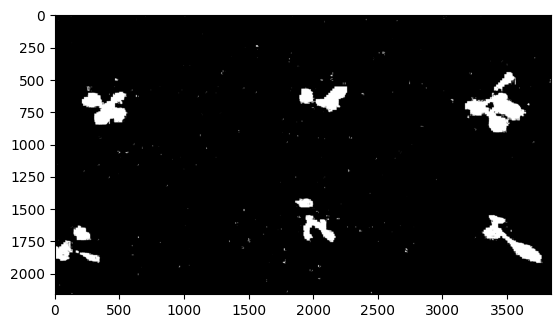

In [13]:
a_thresh = pcv.threshold.binary(gray_img=a, threshold=127, object_type='dark')

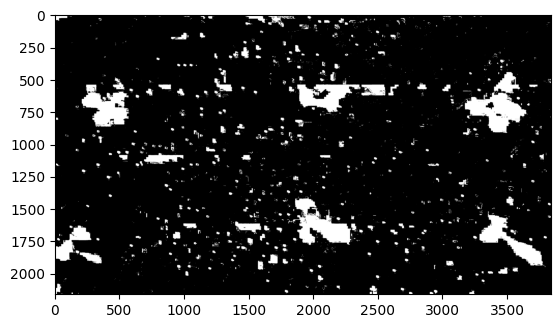

In [14]:
gaus = pcv.threshold.gaussian(gray_img=a, ksize=5000, offset=3,
                              object_type='dark')

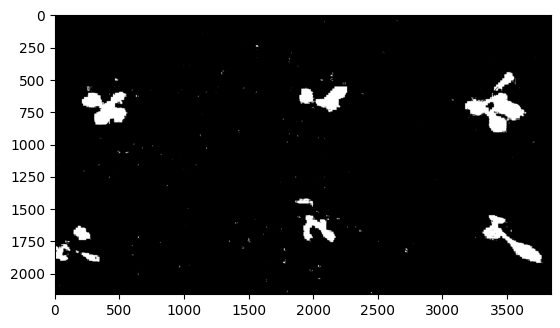

In [15]:
threshold_mean = pcv.threshold.mean(gray_img=a, ksize=2000, offset=5,
                                    object_type='dark')

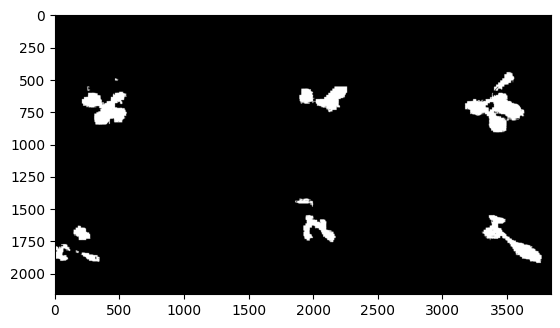

In [16]:
a_fill = pcv.fill(bin_img=threshold_mean, size=200)

There were 278 objects not annotated.


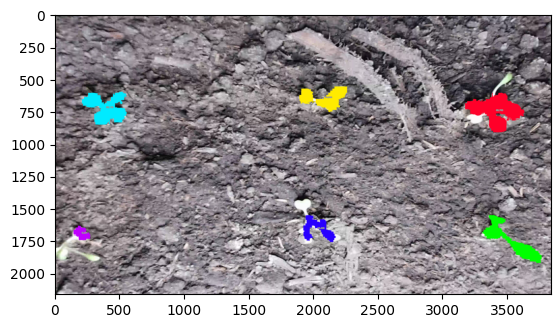

In [18]:
plotting_img = pcv.visualize.obj_sizes(img=img, mask=a_fill, num_objects=6)

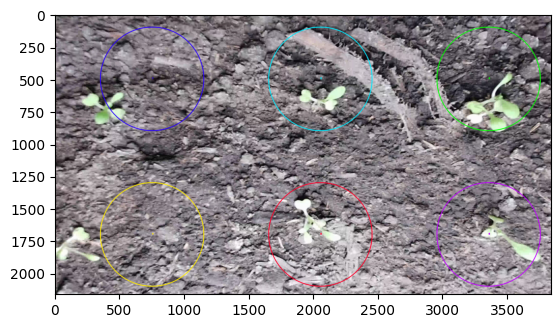

In [27]:
rois1 = pcv.roi.multi(img=img, coord=(750,500), radius=400,
                      spacing=(1300,1200), nrows=2, ncols=3)

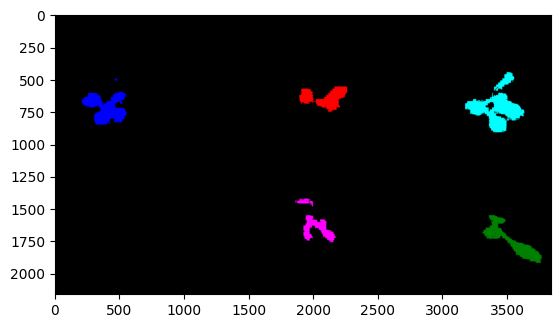

In [28]:
lbl_mask, n_lbls = pcv.create_labels(mask=a_fill, rois=rois1)

In [14]:
print(np.unique(lbl_mask))  
# Output: array([0, 1, 2, 3])
print(n_lbls)  
# Output: 3


[0 1 2 3 4 5 6]
6


In [ ]:
pcv.print_image(lbl_mask, "mask_filled.png")

In [19]:
analyze_color(rgb_img=img, labeled_mask=lbl_mask, n_labels=n_lbls, colorspaces='all')

alt.FacetChart(...)

alt.FacetChart(...)

In [2]:
pcv.outputs.save_results(filename="test_output.json") 

results_dict = pcv.outputs.observations
print(results_dict)

{}
